# Load Data

In [528]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data_path = 'data/'
train_data = pd.read_csv(data_path + 'train_data.csv')
test_data = pd.read_csv(data_path + 'test_data.csv')

names = test_data['name']
target_data = train_data['poi']

train_data.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [529]:
train_data.shape, test_data.shape, target_data.shape

((113, 22), (33, 21), (113,))

In [530]:
train_data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


# Data Visualizations

bonus
count    1.130000e+02
mean     6.194126e+05
std      1.242456e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+05
75%      7.500000e+05
max      8.000000e+06
Name: bonus, dtype: float64


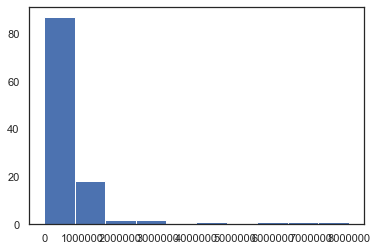

None
deferral_payments
count    1.130000e+02
mean     1.572057e+05
std      5.041240e+05
min     -1.025000e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.964506e+06
Name: deferral_payments, dtype: float64


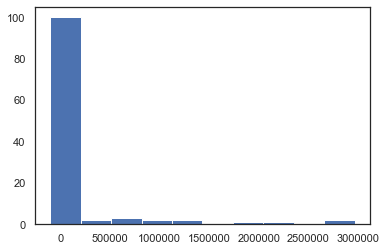

None
deferred_income
count    1.130000e+02
mean    -1.391793e+05
std      4.883707e+05
min     -3.504386e+06
25%     -2.500000e+04
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: deferred_income, dtype: float64


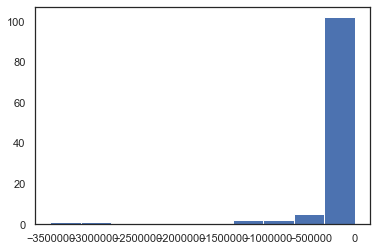

None
director_fees
count       113.000000
mean      10284.707965
std       31658.955219
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      125034.000000
Name: director_fees, dtype: float64


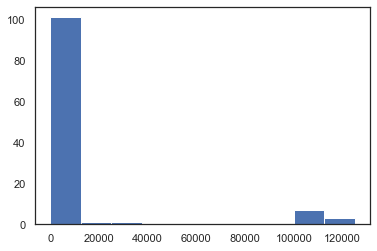

None
exercised_stock_options
count    1.130000e+02
mean     2.139748e+06
std      5.251192e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.934890e+05
75%      1.624396e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64


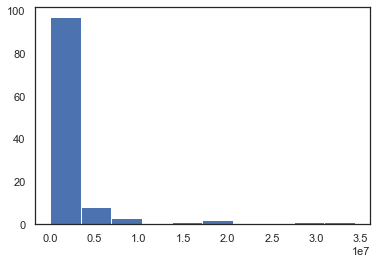

None
expenses
count       113.000000
mean      32973.097345
std       45358.746287
min           0.000000
25%           0.000000
50%       16514.000000
75%       50080.000000
max      228763.000000
Name: expenses, dtype: float64


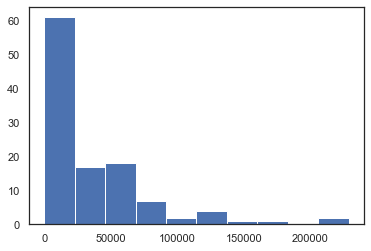

None
from_messages
count      113.000000
mean       409.168142
std       1607.452015
min          0.000000
25%          0.000000
50%         16.000000
75%         59.000000
max      14368.000000
Name: from_messages, dtype: float64


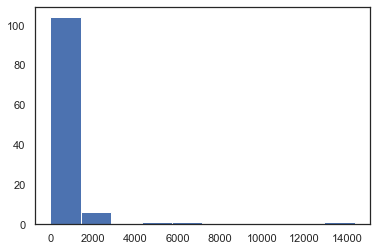

None
from_poi_to_this_person
count    113.000000
mean      37.274336
std       76.533402
min        0.000000
25%        0.000000
50%        0.000000
75%       37.000000
max      528.000000
Name: from_poi_to_this_person, dtype: float64


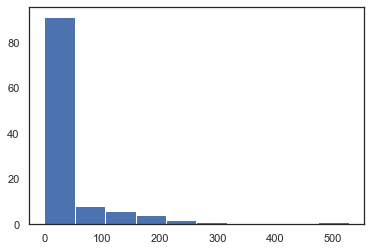

None
from_this_person_to_poi
count    113.000000
mean      23.061947
std       70.089392
min        0.000000
25%        0.000000
50%        0.000000
75%       11.000000
max      411.000000
Name: from_this_person_to_poi, dtype: float64


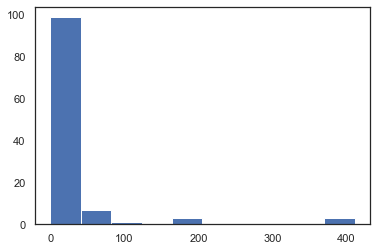

None
loan_advances
count    1.130000e+02
mean     7.250000e+05
std      7.668983e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.152500e+07
Name: loan_advances, dtype: float64


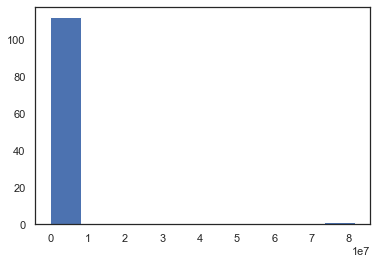

None
long_term_incentive
count    1.130000e+02
mean     3.437012e+05
std      7.367731e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.353490e+05
max      5.145434e+06
Name: long_term_incentive, dtype: float64


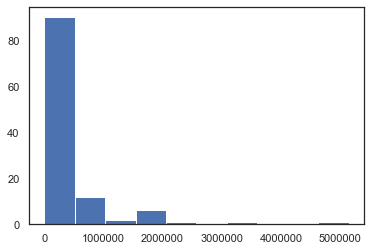

None
other
count    1.130000e+02
mean     2.730552e+05
std      1.068036e+06
min      0.000000e+00
25%      0.000000e+00
50%      7.130000e+02
75%      1.111220e+05
max      1.035973e+07
Name: other, dtype: float64


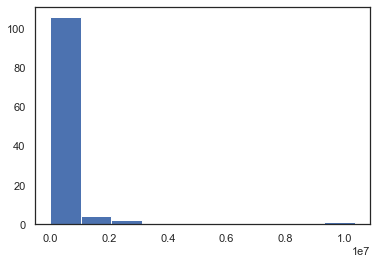

None
restricted_stock
count    1.130000e+02
mean     9.396291e+05
std      2.202460e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.605280e+05
75%      6.982420e+05
max      1.476169e+07
Name: restricted_stock, dtype: float64


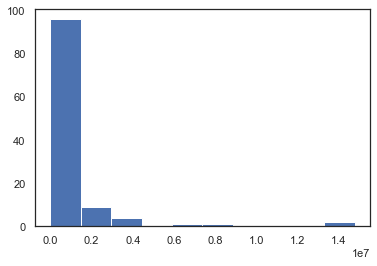

None
restricted_stock_deferred
count       113.000000
mean     -19635.902655
std       85965.881870
min     -560222.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       44093.000000
Name: restricted_stock_deferred, dtype: float64


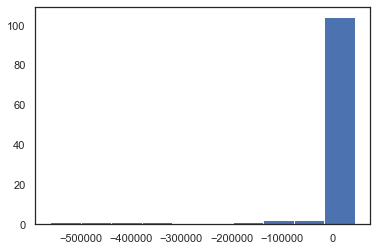

None
salary
count    1.130000e+02
mean     1.769459e+05
std      1.904034e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.991570e+05
75%      2.652140e+05
max      1.111258e+06
Name: salary, dtype: float64


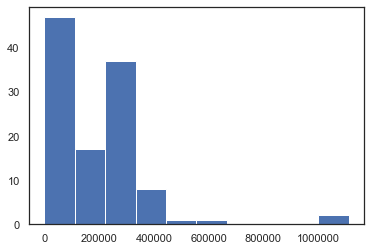

None
shared_receipt_with_poi
count     113.000000
mean      639.283186
std      1039.799616
min         0.000000
25%         0.000000
50%        71.000000
75%       742.000000
max      4527.000000
Name: shared_receipt_with_poi, dtype: float64


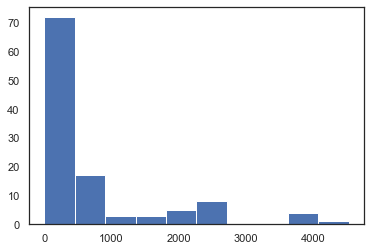

None
to_messages
count      113.000000
mean      1240.212389
std       2379.796707
min          0.000000
25%          0.000000
50%        232.000000
75%       1433.000000
max      15149.000000
Name: to_messages, dtype: float64


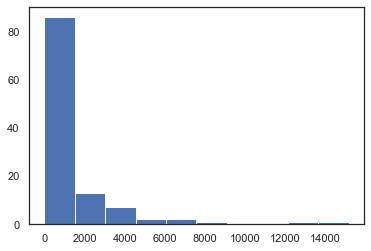

None
total_payments
count    1.130000e+02
mean     2.201184e+06
std      9.775920e+06
min      0.000000e+00
25%      8.499200e+04
50%      9.690680e+05
75%      1.747522e+06
max      1.035598e+08
Name: total_payments, dtype: float64


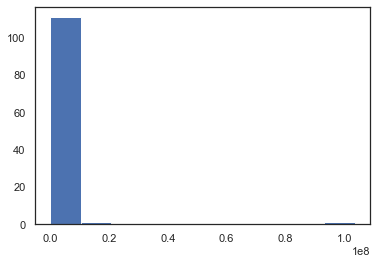

None
total_stock_value
count    1.130000e+02
mean     3.058932e+06
std      6.791932e+06
min     -4.409300e+04
25%      2.211410e+05
50%      8.802900e+05
75%      2.072035e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64


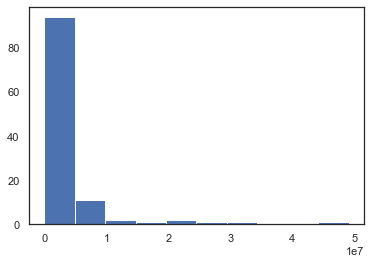

None


((113, 19), (33, 19))

In [547]:
import matplotlib.pyplot as plt

num_features = []
for dtype, feature in zip(train_data.dtypes, train_data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(dtype)
        
num_features = list(train_data.columns[list(train_data.dtypes.isin(num_features))])
num_features = list(train_data[num_features].columns[list(train_data[num_features].apply(lambda x:len(x.unique())!=2 ))])
for col in num_features:
    plt.hist(train_data[col])
    print(col)
    print(train_data[col].describe())
    print(plt.show())
    
train_data = train_data[num_features]
test_data = test_data[num_features]
train_data.shape, test_data.shape

In [548]:
# FacetGrid

# import seaborn as sns
# sns.set(style = "white", color_codes = True)
# import matplotlib.pyplot as plt

# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "from_poi_to_this_person", "from_this_person_to_poi") \
#    .add_legend()

# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "from_messages", "to_messages") \
#    .add_legend()

# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "restricted_stock", "restricted_stock_deferred") \
#    .add_legend()

# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "deferral_payments", "deferred_income") \
#    .add_legend()

# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "total_payments", "total_stock_value") \
#    .add_legend()

KeyError: 'poi'

In [ ]:
# Box Plot
sns.boxplot(x = "poi", y = "bonus", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "deferral_payments", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "deferred_income", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "director_fees", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "exercised_stock_options", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "expenses", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "from_messages", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "from_poi_to_this_person", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "from_this_person_to_poi", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "loan_advances", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "long_term_incentive", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "other", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "restricted_stock", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "restricted_stock_deferred", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "salary", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "shared_receipt_with_poi", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "to_messages", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "total_payments", data = train_data)

In [ ]:
sns.boxplot(x = "poi", y = "total_stock_value", data = train_data)

# Data Preprocessing

In [533]:
# Missing Data
# train_data["bonus"] = train_data["bonus"].fillna(train_data['bonus'].mean())
# train_data["deferral_payments"] = train_data["deferral_payments"].fillna(train_data['deferral_payments'].mean())
# train_data["deferred_income"] = train_data["deferred_income"].fillna(train_data['deferred_income'].mean())
# train_data["director_fees"] = train_data["director_fees"].fillna(train_data['director_fees'].mean())
# train_data["exercised_stock_options"] = train_data["exercised_stock_options"].fillna(train_data['exercised_stock_options'].mean())
# train_data["expenses"] = train_data["expenses"].fillna(train_data['expenses'].mean())
# train_data["from_messages"] = train_data["from_messages"].fillna(train_data['from_messages'].mean())
# train_data["from_poi_to_this_person"] = train_data["from_poi_to_this_person"].fillna(train_data['from_poi_to_this_person'].mean())
# train_data["from_this_person_to_poi"] = train_data["from_this_person_to_poi"].fillna(train_data['from_this_person_to_poi'].mean())
# train_data["loan_advances"] = train_data["loan_advances"].fillna(train_data['loan_advances'].mean())
# train_data["long_term_incentive"] = train_data["long_term_incentive"].fillna(train_data['long_term_incentive'].mean())
# train_data["other"] = train_data["other"].fillna(train_data['other'].mean())
# train_data["restricted_stock"] = train_data["restricted_stock"].fillna(train_data['restricted_stock'].mean())
# train_data["restricted_stock_deferred"] = train_data["restricted_stock_deferred"].fillna(train_data['restricted_stock_deferred'].mean())
# train_data["salary"] = train_data["salary"].fillna(train_data['salary'].mean())
# train_data["shared_receipt_with_poi"] = train_data["shared_receipt_with_poi"].fillna(train_data['shared_receipt_with_poi'].mean())
# train_data["to_messages"] = train_data["to_messages"].fillna(train_data['to_messages'].mean())
# train_data["total_payments"] = train_data["total_payments"].fillna(train_data['total_payments'].mean())
# train_data["total_stock_value"] = train_data["total_stock_value"].fillna(train_data['total_stock_value'].mean())

# test_data["bonus"] = test_data["bonus"].fillna(test_data['bonus'].mean())
# test_data["deferral_payments"] = test_data["deferral_payments"].fillna(test_data['deferral_payments'].mean())
# test_data["deferred_income"] = test_data["deferred_income"].fillna(test_data['deferred_income'].mean())
# test_data["director_fees"] = test_data["director_fees"].fillna(test_data['director_fees'].mean())
# test_data["exercised_stock_options"] = test_data["exercised_stock_options"].fillna(test_data['exercised_stock_options'].mean())
# test_data["expenses"] = test_data["expenses"].fillna(test_data['expenses'].mean())
# test_data["from_messages"] = test_data["from_messages"].fillna(test_data['from_messages'].mean())
# test_data["from_poi_to_this_person"] = test_data["from_poi_to_this_person"].fillna(test_data['from_poi_to_this_person'].mean())
# test_data["from_this_person_to_poi"] = test_data["from_this_person_to_poi"].fillna(test_data['from_this_person_to_poi'].mean())
# test_data["loan_advances"] = test_data["loan_advances"].fillna(test_data['loan_advances'].mean())
# test_data["long_term_incentive"] = test_data["long_term_incentive"].fillna(test_data['long_term_incentive'].mean())
# test_data["other"] = test_data["other"].fillna(test_data['other'].mean())
# test_data["restricted_stock"] = test_data["restricted_stock"].fillna(test_data['restricted_stock'].mean())
# test_data["restricted_stock_deferred"] = test_data["restricted_stock_deferred"].fillna(test_data['restricted_stock_deferred'].mean())
# test_data["salary"] = test_data["salary"].fillna(test_data['salary'].mean())
# test_data["shared_receipt_with_poi"] = test_data["shared_receipt_with_poi"].fillna(test_data['shared_receipt_with_poi'].mean())
# test_data["to_messages"] = test_data["to_messages"].fillna(test_data['to_messages'].mean())
# test_data["total_payments"] = test_data["total_payments"].fillna(test_data['total_payments'].mean())
# test_data["total_stock_value"] = test_data["total_stock_value"].fillna(test_data['total_stock_value'].mean())

# print(train_data.isnull().sum())

# Outlier
# 檢查數值特徵是否有 Outlier
# print(train_data["bonus"].describe())
# train_data["bonus"] = train_data[train_data["bonus"] < np.percentile(train_data["bonus"], 75)]['bonus']
# sns.boxplot(x = "poi", y = "bonus", data = train_data)
# print(train_data["total_payments"].describe())
# train_data["total_payments"] = train_data[train_data["total_payments"] < 10**7]['total_payments']
# sns.boxplot(x = "poi", y = "total_payments", data = train_data)

# Categorical Variable/Dummy Variables
# 使用 One-hot encoding 將非數值特徵轉換為數值特徵，例如：將星期轉為 1~7 的數字
# 不過 One-hot encoding 只適合運用在類型種類固定的特徵，當類型種類過多時，不適用 One-hot encoding

# Noise Handle

# Feature Engineering

In [534]:
# https://github.com/dnc1994/Kaggle-Playground/blob/master/features.ipynb

# Feature Selection
# 可以使用 RandomForest 查看 Feature Importance 進行篩選

# Feature Encoding

# Split Data

In [535]:
train_data[:] = np.nan_to_num(train_data)
test_data[:] = np.nan_to_num(test_data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.25, random_state = 4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((84, 19), (84,), (29, 19), (29,))

# Model Selection

In [537]:
print(train_data.isnull().sum())
# Gradient Boosting
# Random Forest
# Extra Randomized Trees
# SVM
# Linear Regression
# Logistic Regression
# Neural Networks
# Xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
predict = model.predict(x_test)
# print('GaussianNB, roc_auc_score = ', roc_auc_score(y_test, predict))
print('GaussianNB, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('KNeighborsClassifier, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('RandomForestClassifier, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('LogisticRegression, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('SVC, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('DecisionTreeClassifier, accuracy_score = ', accuracy_score(y_test, predict))

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
exercised_stock_options      0
expenses                     0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
loan_advances                0
long_term_incentive          0
other                        0
restricted_stock             0
restricted_stock_deferred    0
salary                       0
shared_receipt_with_poi      0
to_messages                  0
total_payments               0
total_stock_value            0
dtype: int64
GaussianNB, accuracy_score =  0.896551724137931
KNeighborsClassifier, accuracy_score =  0.8620689655172413
RandomForestClassifier, accuracy_score =  0.8275862068965517
LogisticRegression, accuracy_score =  0.8620689655172413
SVC, accuracy_score =  0.8620689655172413
DecisionTreeClassifier, accuracy_score =  0.8620689655172413


# Feature Scaling

In [538]:
from sklearn.preprocessing import StandardScaler, Normalizer

normalizer = Normalizer()
normalize_train_data = normalizer.fit_transform(train_data)

from sklearn.model_selection import cross_val_score

model = GaussianNB()
print('GaussianNB, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

model = KNeighborsClassifier()
print('KNeighborsClassifier, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

model = RandomForestClassifier()
print('RandomForestClassifier, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

model = LogisticRegression()
print('LogisticRegression, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

model = SVC()
print('SVC, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

model = DecisionTreeClassifier()
print('DecisionTreeClassifier, cross_val_score = ', cross_val_score(model, normalize_train_data, target_data).mean())

GaussianNB, cross_val_score =  0.4961884961884962
KNeighborsClassifier, cross_val_score =  0.8851928851928852
RandomForestClassifier, cross_val_score =  0.8851928851928852
LogisticRegression, cross_val_score =  0.8851928851928852
SVC, cross_val_score =  0.8851928851928852
DecisionTreeClassifier, cross_val_score =  0.823053823053823


# Principle Component Analysis

In [539]:
from sklearn.decomposition import PCA

pca = PCA()
pca_train_data = pca.fit_transform(train_data)

model = GaussianNB()
print('GaussianNB, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

model = KNeighborsClassifier()
print('KNeighborsClassifier, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

model = RandomForestClassifier()
print('RandomForestClassifier, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

model = LogisticRegression()
print('LogisticRegression, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

model = SVC()
print('SVC, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

model = DecisionTreeClassifier()
print('DecisionTreeClassifier, cross_val_score = ', cross_val_score(model, pca_train_data, target_data).mean())

GaussianNB, cross_val_score =  0.7551397551397553
KNeighborsClassifier, cross_val_score =  0.8851928851928852
RandomForestClassifier, cross_val_score =  0.8937398937398937
LogisticRegression, cross_val_score =  0.8221298221298222
SVC, cross_val_score =  0.8851928851928852
DecisionTreeClassifier, cross_val_score =  0.8045738045738046


# Model Training

In [540]:
# Gaussian Mixture
# Grid Search

# import numpy as np
# from sklearn.mixture import GaussianMixture

# x_all = np.r_[train_data, test_data]
# print('x_all shape :',x_all.shape)

# # USING THE GAUSSIAN MIXTURE MODEL 
# lowest_bic = np.infty
# bic = []
# n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
# for cv_type in cv_types:
#     for n_components in n_components_range:
#         gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
#         gmm.fit(x_all)
#         bic.append(gmm.aic(x_all))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm
            
# best_gmm.fit(x_all)
# gmm_train = best_gmm.predict_proba(train_data)
# gmm_test = best_gmm.predict_proba(test_data)

from sklearn.model_selection import GridSearchCV

n_estimators = [10, 50, 100, 200, 400]
max_depth = [1, 3, 5, 10, 20, 40]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)

rfc = RandomForestClassifier()
grid_search_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search_rfc = grid_search_rfc.fit(x_train, y_train)
rfc_best = grid_search_rfc.best_estimator_
print('RandomForestClassifier Accuracy = ', cross_val_score(rfc_best, train_data, target_data).mean())


# svc = SVC()
# parameters = [{'kernel':['linear'],'C':[1,10,100]},
#               {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
# grid_search_svm = GridSearchCV(estimator = svc, param_grid = parameters, cv = 10, n_jobs = -1, scoring = 'accuracy')
# grid_search_svm = grid_search_svm.fit(x_train, y_train)
# svm_best = grid_search_svm.best_estimator_
# print('SVM Accuracy', cross_val_score(svm_best, train_data, target_data).mean())

# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
# lr = LogisticRegression()
# grid_search_lr = GridSearchCV(lr, grid)
# grid_search_lr = grid_search_lr.fit(x_train, y_train)
# lr_best = grid_search_lr.best_params_
# # print('LR Accuracy', cross_val_score(lr_best, train_data, target_data).mean())

RandomForestClassifier Accuracy =  0.8851928851928852


# Cross Validation

In [541]:
# 查看 Model 是否有 Overfitting
# K-Fold CV

# Esemble Generation

In [542]:
# 將多個不同的 Model 組合起來，降低最終 Model 的 Bias 和 Variance
# Bagging：使用不同的訓練集訓練 Model，最後進行每個 Model 權重相同的 Vote
# Boosting：迭代訓練 Model，根據上一次的結果修改權重，效果比 Bagging 好，但更容易 Overfit
# Blending：用不相交的數據訓練 Model，將輸出取平均
# Stacking：

# https://github.com/dnc1994/Kaggle-Playground/blob/master/ensemble.py

# Output

In [545]:
rfc_best.fit(train_data, target_data)
predict = rfc_best.predict_proba(test_data)[:,1]
rfc_best_predict = pd.DataFrame({'name': names, 'poi': predict})

rfc_best_predict.to_csv('Submissions_v1.csv', index=False)

# Refereces
[Data Science London Classification](https://www.kaggle.com/chahat1/data-science-london-classification)